## Gapminder
#### Phân tích bộ dữ liệu Gapminder
Bộ dữ liệu **"gapminder.csv"** là một tập hợp dữ liệu bao gồm các thông tin về các chỉ số kinh tế và xã hội của các quốc gia thuộc 5 châu lục trên thế giới từ năm 1952 đến năm 2007; với ý nghĩa các cột:   
- country: quốc gia   
- continent: châu lục    
- year: năm  
- lifeExp: tuổi thọ trung bình  
- pop: dân số  
- gdpPercap: thu nhập bình quân đầu người  

Dựa trên tập dữ liệu, phân tích sự phát triển toàn cầu, xác định các mối tương quan để hiểu rõ hơn tình hình kinh tế - xã hội toàn cầu trong giai đoạn này.

### Bước 1 - Tìm hiểu dữ liệu
Sau khi đọc dữ liệu:
- Quan sát dữ liệu của các quốc gia (5 dòng đầu, 5 dòng cuối); 
- Kiểm tra kiểu dữ liệu của mỗi cột có hợp lệ ; 
- Số lượng dòng, cột; 
- Số lượng dữ liệu bị thiếu (nếu có).

In [1]:
# Import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu, hiển thị dữ liệu
gapminder = pd.read_csv('data/gapminder.csv')
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
# Hiển thị 5 dòng cuối
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [4]:
# Hiển thị thông tin info
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


Một số thông tin về tập dữ liệu:

- Tập dữ liệu chứa bao nhiêu dòng, bao nhiêu cột?
=> 6 cột, 1704 dòng
- Kiểu dữ liệu các cột đã đúng chưa?
=> year, country, continent cần chuyển thành Catagory
- Có cột nào bị thiếu giá trị không?
=> Không cột nào bị thiết giá trị

In [5]:
gapminder[['country','continent', 'year']]=gapminder[['country','continent', 'year']].astype('category')
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   country    1704 non-null   category
 1   continent  1704 non-null   category
 2   year       1704 non-null   category
 3   lifeExp    1704 non-null   float64 
 4   pop        1704 non-null   int64   
 5   gdpPercap  1704 non-null   float64 
dtypes: category(3), float64(2), int64(1)
memory usage: 52.5 KB


### Bước 2 - Phân tích mô tả

In [6]:
# Hiển thị thông tin describe cho các cột số
gapminder.describe(include='number')

,lifeExp,pop,gdpPercap
count,1704.000000,1.704000e+03,1704.000000
mean,59.474439,2.960121e+07,7215.327081
std,12.917107,1.061579e+08,9857.454543
min,23.599000,6.001100e+04,241.165876
25%,48.198000,2.793664e+06,1202.060309
50%,60.712500,7.023596e+06,3531.846989
75%,70.845500,1.958522e+07,9325.462346
max,82.603000,1.318683e+09,113523.132900


Nhận xét:

=> tuổi thọ trung bình trên thế giới là 60.7 tuổi, dân số trung bình mỗi quốc gia là hơn 7 triệu người, GDP bình quân đầu người là 3531 USD và có sự chênh lệch lớn giữa quốc gia có GDP bình quân thấp nhất (241 USD) và GDP bình quân cao nhất (113523 USD).

In [7]:
# Hiển thị thông tin describe cho các cột phân loại
gapminder.describe(include='category')

,country,continent,year
count,1704,1704,1704
unique,142,5,12
top,Afghanistan,Africa,1952
freq,12,624,142


Nhận xét:

=> Bảng thống kê gồm 142 quốc gia đến từ 5 châu lục, có 12 năm

In [8]:
# Dữ liệu gồm bao nhiêu năm?
12

12

In [9]:
# Đó là những năm nào?
gapminder['year'].astype('int').unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

### Bước 3 - Phân tích trực quan hóa dữ liệu
1. Phân tích các biến định tính
- Thống kê số lượng quốc gia được thống kê ở mỗi châu lục
2. Phân tích các biến định lượng
- Sự phát triển Tuổi thọ trung bình qua các năm
- Sự phát triển Dân số trung bình qua các năm
- Sự phát triển GDP bình quân đầu người qua các năm

#### 3.1 Phân tích biến Survived theo các biến định tính

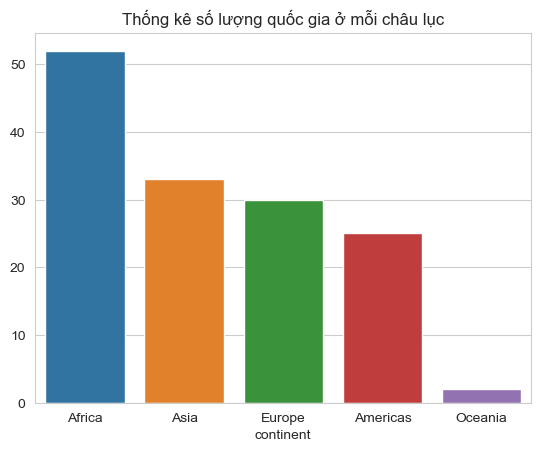

In [10]:
# Thiết lập môi trường cho biểu đồ
sns.set_style("whitegrid")
# Thống kê số lượng quốc gia ở mỗi châu lục
a=gapminder.groupby('continent')['country'].nunique().sort_values(ascending=False)
sns.barplot(x=a.index, y=a.values, order=a.index);
plt.title('Thống kê số lượng quốc gia ở mỗi châu lục');

Nhận xét:

=> Châu Phi có nhiều quốc gia trong bảng thống kê nhất, tiếp đến là Châu Á, Châu Âu, Châu Mỹ, thấp nhất là Châu Đại Dương. 

In [11]:
#Cho biết các quốc gia ở châu Đại Dương.
gapminder.loc[gapminder['continent']=='Oceania', 'country'].unique()

['Australia', 'New Zealand']
Categories (142, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']

#### 3.2 Phân tích các biến định lượng

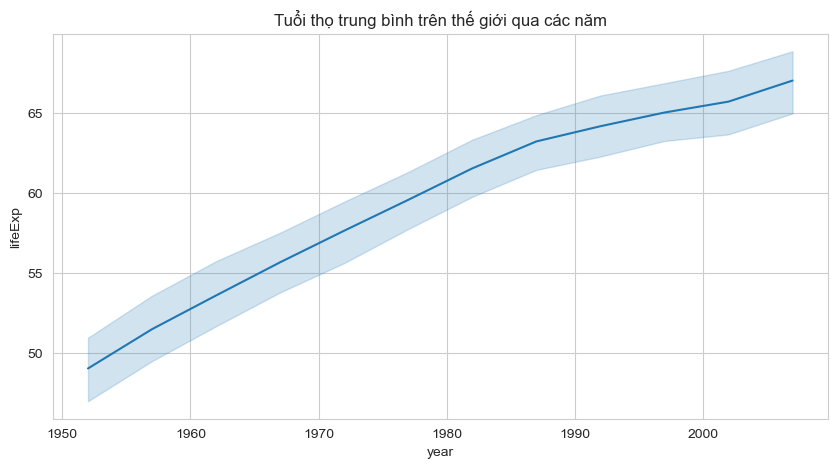

In [12]:
plt.figure(figsize=(10,5))
# Biểu đồ tuổi thọ trung bình theo qua các năm
sns.lineplot(data=gapminder, x='year', y='lifeExp');
plt.title('Tuổi thọ trung bình trên thế giới qua các năm');

Nhận xét:

=> Tuổi thọ trung bình trên thế giới ngày càng tăng đều qua các năm

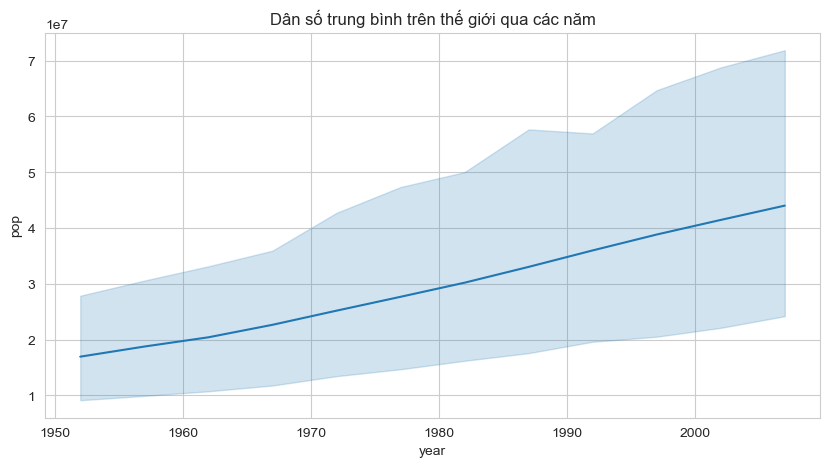

In [13]:
# Biểu đồ dân số trung bình theo qua các năm
plt.figure(figsize=(10,5))
sns.lineplot(data=gapminder, x='year', y='pop');
plt.title('Dân số trung bình trên thế giới qua các năm');

Nhận xét:

=> Dân số thế giới ngày càng tăng qua các năm

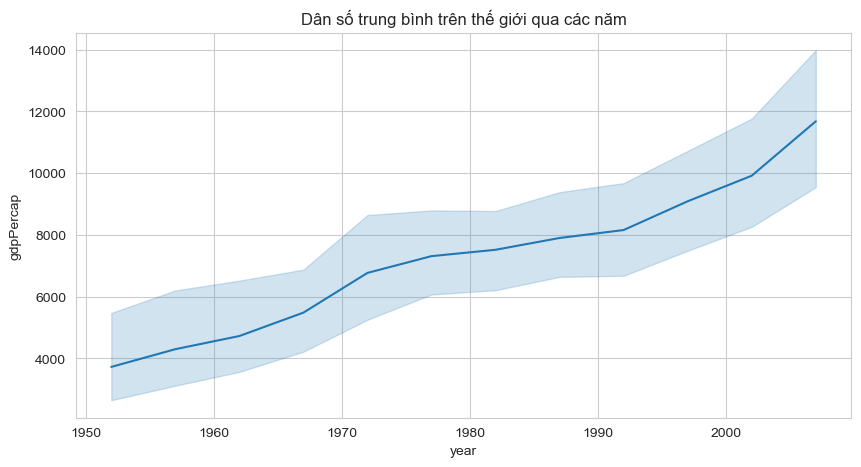

In [14]:
# Biểu đồ GDP bình quân đầu người qua các năm
plt.figure(figsize=(10,5))
sns.lineplot(data=gapminder, x='year', y='gdpPercap');
plt.title('Dân số trung bình trên thế giới qua các năm');

Nhận xét:

=> GDP trung bình của thế giới ngày càng tăng qua các năm

### Bước 4 - Phân tích trực quan hóa sự phát triển của các châu lục
- Sự phát triển Tuổi thọ trung bình của mỗi châu lục qua các năm
- Sự phát triển Tổng Dân số của mỗi châu lục qua các năm
- Sự phát triển GDP bình quân đầu người của mỗi châu lục qua các năm

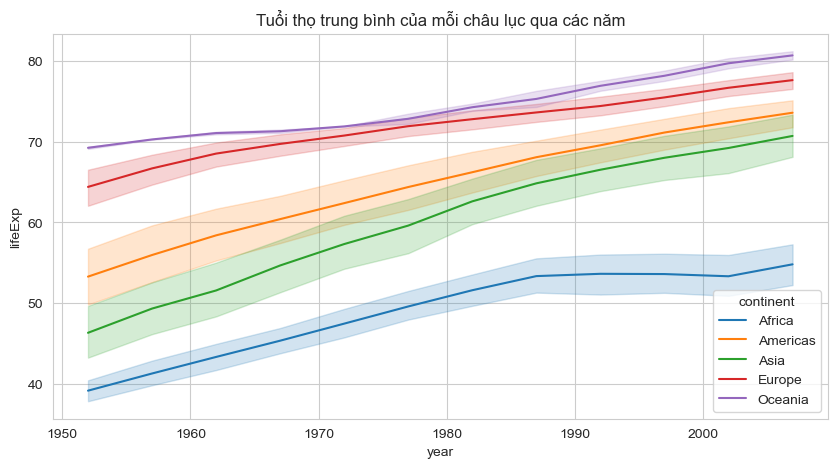

In [15]:
# Biểu đồ thể hiện sự phát triển Tuổi thọ trung bình của mỗi châu lục qua các năm
plt.figure(figsize=(10,5))
sns.lineplot(data=gapminder, x='year', y='lifeExp', hue='continent');
plt.title('Tuổi thọ trung bình của mỗi châu lục qua các năm');

Nhận xét:

=> Tổng quan tuổi thọ ở các châu lục đều tăng qua các năm. Riêng Châu Phi có giai đoạn chững lại không tăng vào 1990 -2000 nhưng sau đó tiếp tục tăng trở lại. 

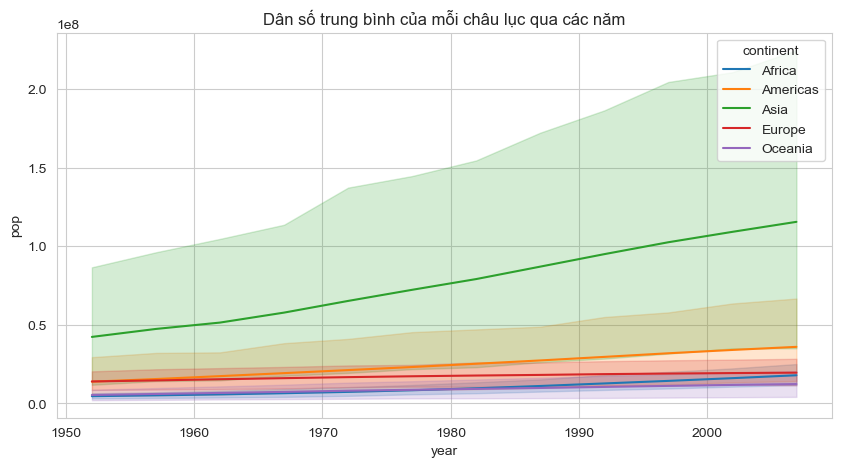

In [16]:
# Biểu đồ thể hiện sự phát triển Tổng Dân số của mỗi châu lục qua các năm
plt.figure(figsize=(10,5))
sns.lineplot(data=gapminder, x='year', y='pop', hue='continent');
plt.title('Dân số trung bình của mỗi châu lục qua các năm');

Nhận xét:

=> Chỉ có dân số Châu Á tăng nhiều và liên tục qua các năm, các châu còn lại không tăng hoặc tăng ít không đáng kể. 

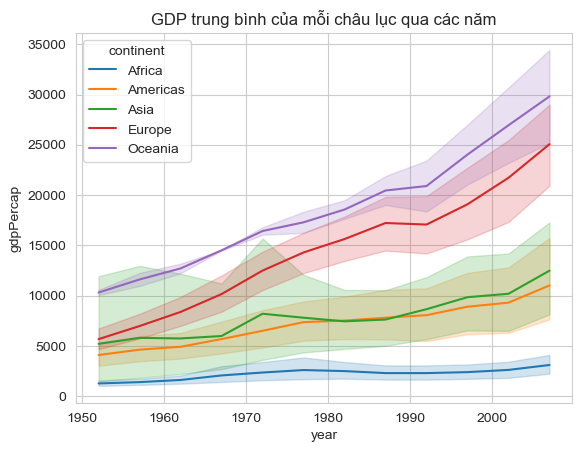

In [17]:
# Biểu đồ thể hiện sự phát triển GDP bình quân đầu người của mỗi châu lục qua các năm
#plt.figure(figsize=(10,5))
sns.lineplot(data=gapminder, x='year', y='gdpPercap', hue='continent');
plt.title('GDP trung bình của mỗi châu lục qua các năm');

Nhận xét:

=> GDP bình quân của Châu Âu và Châu Đại Dương tăng mạnh và liên tục qua các năm, Châu Á và Châu Mỹ tăng trưởng liên tục nhưng không nhiều. Riêng Châu Phi tăng trưởng ít và có giai đoạn đi ngang, không tăng trưởng từ 1980-2000. 

### Bước 5 - Phân tích dữ liệu tổng hợp tất cả các năm từ 1952-2007 của từng châu lục
- Biểu đồ boxplot thể hiện phân bố của tuổi thọ trung bình theo lục địa
- Biểu đồ Scatter plot thể hiện mối tương quan giữa GDP bình quân đầu người và tuổi thọ

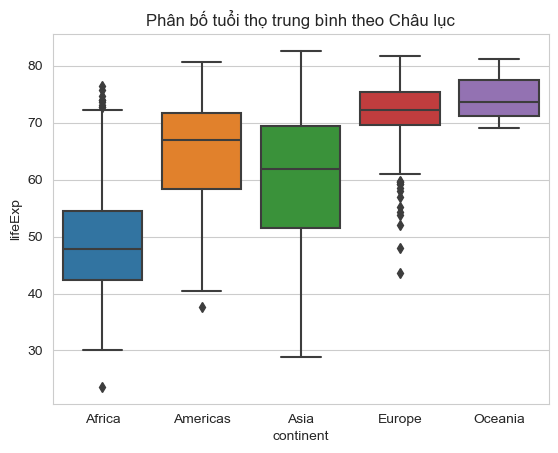

In [18]:
# Biểu đồ phân bố tuổi thọ trung bình theo lục địa
sns.boxplot(data=gapminder, x='continent', y='lifeExp');
plt.title('Phân bố tuổi thọ trung bình theo Châu lục');

Nhận xét:

=> Châu Đại Dương và Châu Mỹ có tuổi thọ trung bình phân bố tương đối đồng đều và xếp lần lượt cao nhất và cao thứ 2 trên thế giới, kế đên là Châu Mỹ và Châu Á, Châu Á có khoảng phân bố tuổi thọ trung bình rộng hơn các châu lục còn lại (50-70 tuổi), Châu Phi có tuổi thọ trung bình thấp nhất. 

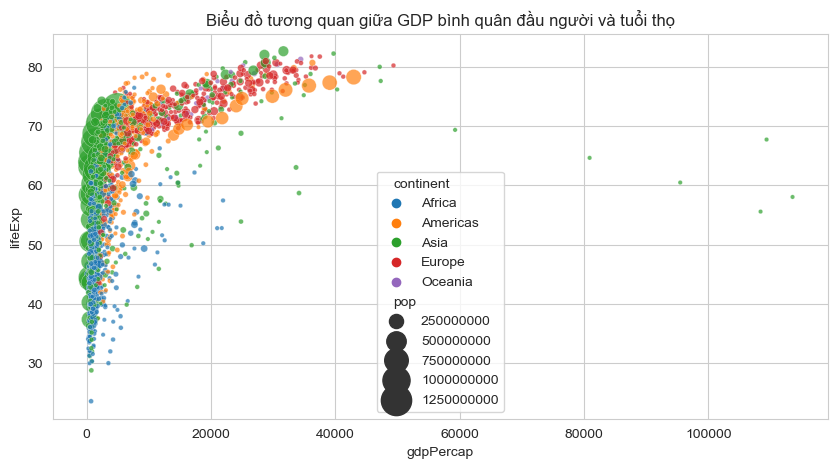

In [38]:
plt.figure(figsize=(10,5))
# Scatter plot mối quan hệ giữa GDP bình quân đầu người và tuổi thọ
sns.scatterplot(data=gapminder, x='gdpPercap', y='lifeExp', hue="continent", size="pop", sizes=(10, 500), alpha=0.7);
plt.title('Biểu đồ tương quan giữa GDP bình quân đầu người và tuổi thọ');

Nhận xét:

=> Ta thấy theo biểu đồ, khi có thu nhập càng cao thì tuổi thọ trung bình của người dân càng cao

### Bước 6 - Phân tích tỷ lệ tăng trưởng của các quốc gia năm 2007 so với năm 1952
- Biểu đồ thể hiện 10 quốc gia có tốc độ tăng trưởng GDP bình quân đầu người cao nhất
- Biểu đồ thể hiện 10 quốc gia có tốc độ tăng trưởng GDP bình quân đầu người thấp nhất

In [20]:
# Truy xuất dữ liệu của năm 1952 và 2007 và lưu vào 2 dataframe gap_1952, gap_2007 tương ứng
gap_1952 = gapminder.loc[gapminder['year']==1952]
gap_2007 = gapminder.loc[gapminder['year']==2007]

In [21]:
# Xác định tốc độ tăng trưởng GDP bình quân đầu người từ 1952 đến 2007
gap_new=pd.merge(gap_1952, gap_2007, how='inner', on='country')
gap_new.rename(columns={'gdpPercap_x':'gdpPercap_1952','gdpPercap_y':'gdpPercap_2007'}, inplace=True)
gap_new['growth_rate']=(gap_new['gdpPercap_2007']-gap_new['gdpPercap_1952'])/gap_new['gdpPercap_1952']
gap_new=gap_new[['country', 'gdpPercap_1952', 'gdpPercap_2007','growth_rate']]
gap_new.head()

,country,gdpPercap_1952,gdpPercap_2007,growth_rate
0,Afghanistan,779.445314,974.580338,0.250351
1,Albania,1601.056136,5937.029526,2.708196
2,Algeria,2449.008185,6223.367465,1.541179
3,Angola,3520.610273,4797.231267,0.362614
4,Argentina,5911.315053,12779.379640,1.161851


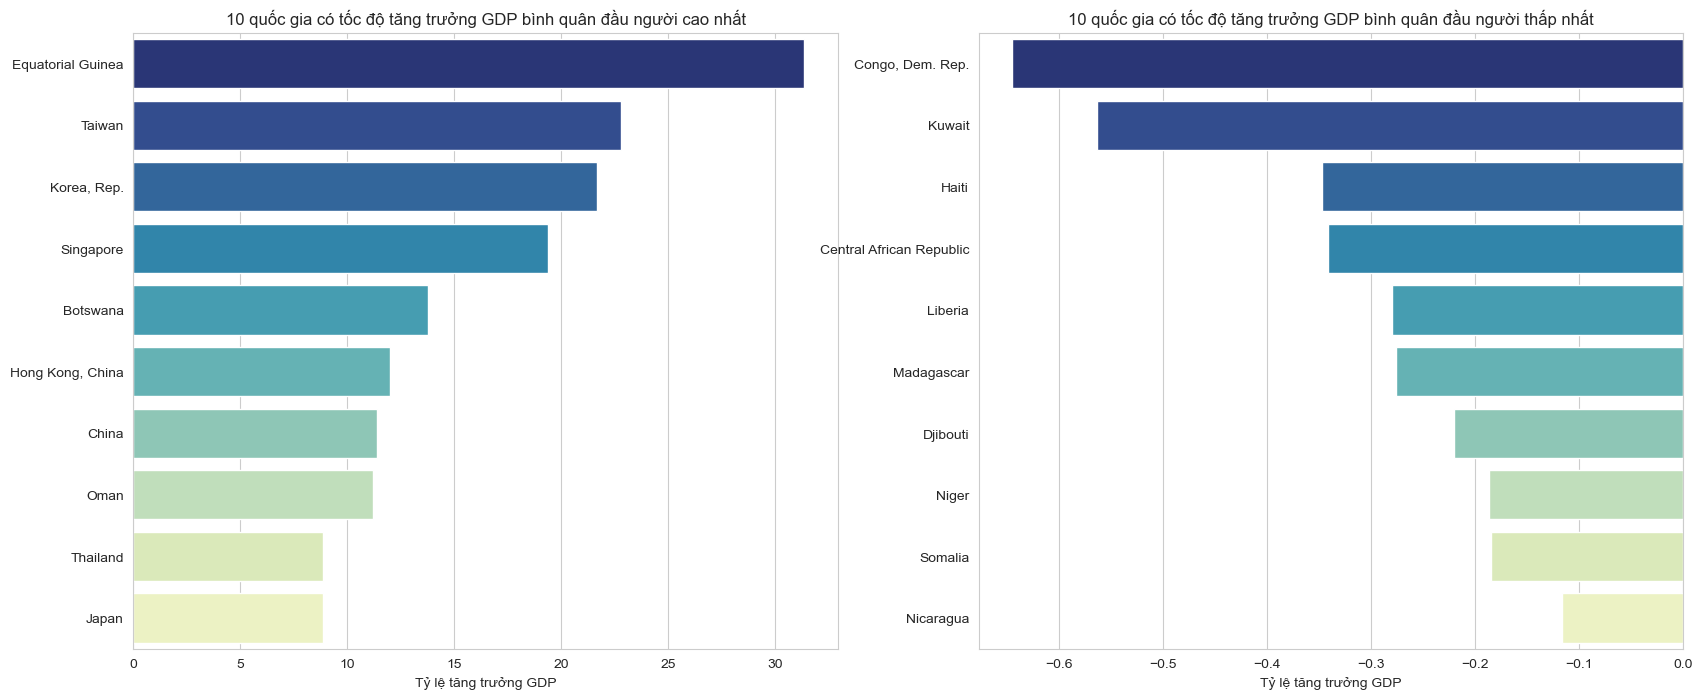

In [44]:
# Biểu đồ 10 quốc gia có tốc độ tăng trưởng GDP bình quân đầu người cao nhất
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
gap_new1 = gap_new.sort_values(by='growth_rate', ascending=False).head(10)
sns.barplot(x=gap_new1['growth_rate'], y=gap_new1['country'], order=gap_new1['country'], palette='YlGnBu_r')
plt.title('10 quốc gia có tốc độ tăng trưởng GDP bình quân đầu người cao nhất')
plt.xlabel('Tỷ lệ tăng trưởng GDP');
plt.ylabel(None);

# Biểu đồ 10 quốc gia có tốc độ tăng trưởng GDP bình quân đầu người thấp nhất
plt.subplot(1, 2, 2)
gap_new2 = gap_new.sort_values(by='growth_rate').head(10)
sns.barplot(x=gap_new2['growth_rate'], y=gap_new2['country'], order=gap_new2['country'], palette='YlGnBu_r')
plt.title('10 quốc gia có tốc độ tăng trưởng GDP bình quân đầu người thấp nhất');
plt.xlabel('Tỷ lệ tăng trưởng GDP');
plt.ylabel(None);

Nhận xét:

=> Đa số các quốc gia có tốc độ tăng trưởng GDP cao nhất thuộc Châu Á, thấp nhất thuộc Châu Phi

In [23]:
# Xác định tốc độ tăng trưởng dân số từ 1952 đến 2007
pop_new=pd.merge(gap_1952, gap_2007, how='inner', on='country')
pop_new.rename(columns={'pop_x':'pop_1952','pop_y':'pop_2007'}, inplace=True)
pop_new['growth_rate_pop']=(pop_new['pop_2007']-pop_new['pop_1952'])/pop_new['pop_1952']
pop_new=pop_new[['country', 'pop_1952', 'pop_2007','growth_rate_pop']]
pop_new.head()

,country,pop_1952,pop_2007,growth_rate_pop
0,Afghanistan,8425333,31889923,2.785004
1,Albania,1282697,3600523,1.806994
2,Algeria,9279525,33333216,2.592125
3,Angola,4232095,12420476,1.934829
4,Argentina,17876956,40301927,1.254407


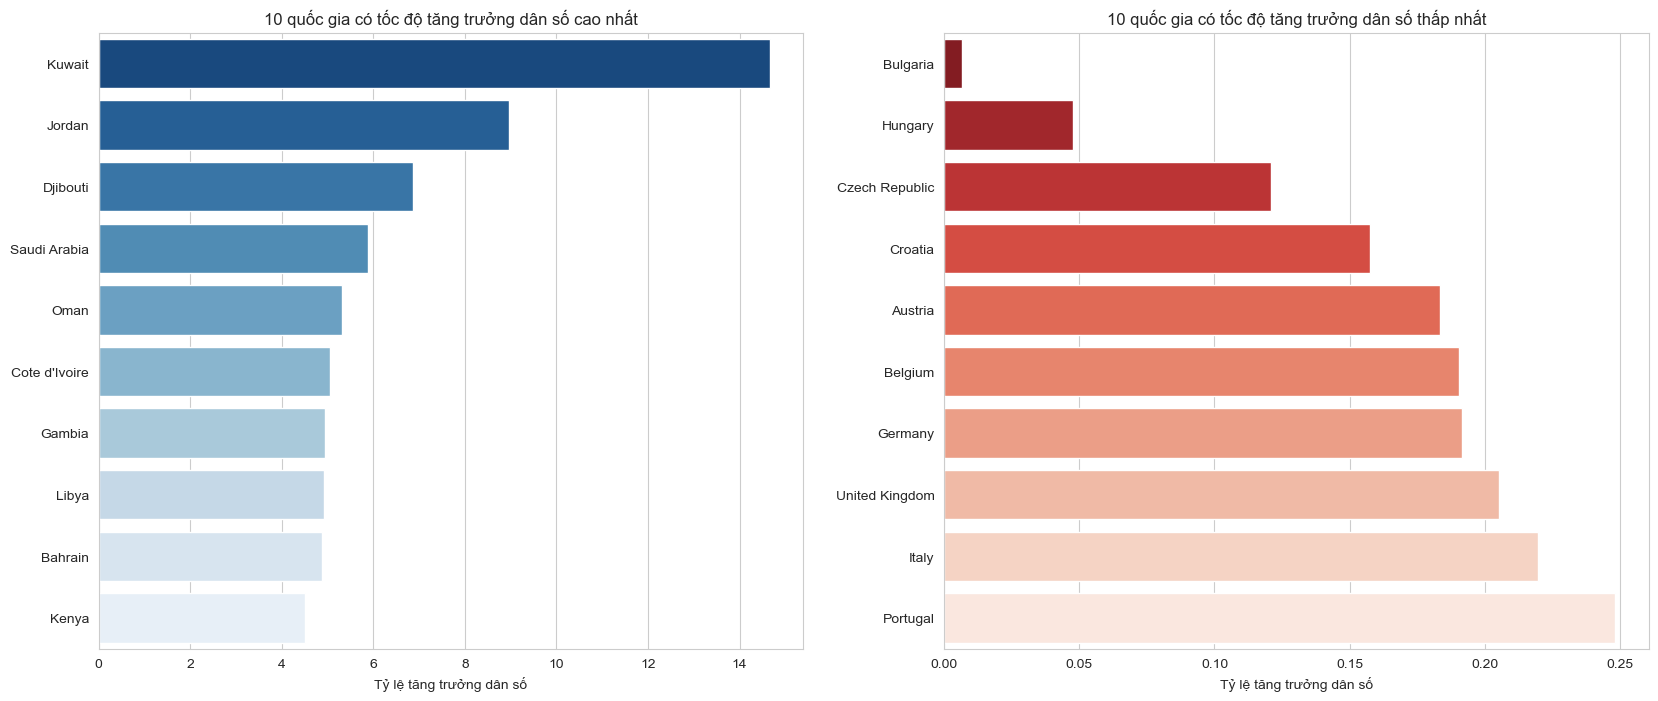

In [45]:
# Biểu đồ 10 quốc gia có tốc độ tăng trưởng dân số cao nhất
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
pop_new1=pop_new.sort_values(by='growth_rate_pop', ascending=False).head(10)
sns.barplot(x=pop_new1['growth_rate_pop'], y=pop_new1['country'], order=pop_new1['country'], palette='Blues_r');
plt.title('10 quốc gia có tốc độ tăng trưởng dân số cao nhất')
plt.xlabel('Tỷ lệ tăng trưởng dân số');
plt.ylabel(None);

# Biểu đồ 10 quốc gia có tốc độ tăng trưởng dân số thấp nhất
plt.subplot(1, 2, 2)
pop_new2=pop_new.sort_values(by='growth_rate_pop').head(10)
sns.barplot(x=pop_new2['growth_rate_pop'], y=pop_new2['country'], order=pop_new2['country'], palette='Reds_r');
plt.title('10 quốc gia có tốc độ tăng trưởng dân số thấp nhất');
plt.xlabel('Tỷ lệ tăng trưởng dân số');
plt.ylabel(None);

Nhận xét:

=> Các nước có tốc độ tăng trưởng dân số cao nhất chủ yếu thuộc Châu Phi, tăng trưởng dân số thấp nhất thuộc Châu Úc

### Bước 7 - Phân tích giá trị tăng trưởng của các quốc gia năm 2007 so với năm 1952
- Biểu đồ thể hiện 5 quốc gia có tăng trưởng tuổi thọ trung bình cao nhất
- Biểu đồ thể hiện 5 quốc gia có tăng trưởng GDP bình quân đầu người cao nhất

In [25]:
# Xác định sự cải thiện về tuổi thọ trung bình từ 1952 đến 2007
lifeExp_new=pd.merge(gap_1952, gap_2007, how='inner', on='country')
lifeExp_new.rename(columns={'lifeExp_x':'lifeExp_1952','lifeExp_y':'lifeExp_2007'}, inplace=True)
lifeExp_new['growth_rate_lifeExp']=(lifeExp_new['lifeExp_2007']-lifeExp_new['lifeExp_1952'])/lifeExp_new['lifeExp_1952']
lifeExp_new=lifeExp_new[['country', 'lifeExp_1952', 'lifeExp_2007','growth_rate_lifeExp']]

# 5 quốc gia có sự cải thiện về tuổi thọ trung bình nhanh nhất
lifeExp_new=lifeExp_new.sort_values(by='growth_rate_lifeExp', ascending=False).head()
lifeExp_new

,country,lifeExp_1952,lifeExp_2007,growth_rate_lifeExp
96,Oman,37.578,75.640,1.012880
46,Gambia,30.000,59.448,0.981600
139,"Yemen, Rep.",32.548,62.698,0.926324
59,Indonesia,37.468,70.650,0.885609
137,Vietnam,40.412,74.249,0.837301


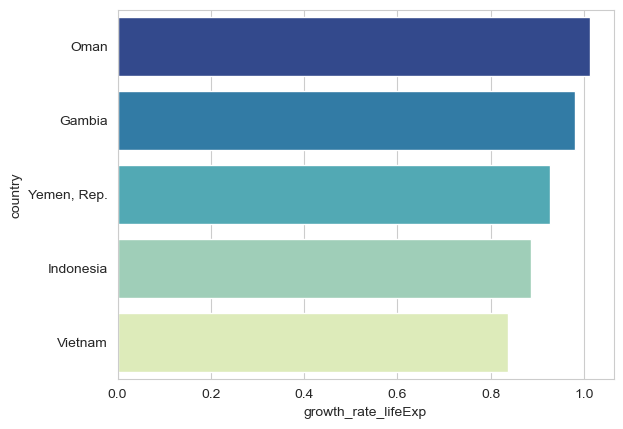

In [26]:
# Biểu đồ 5 quốc gia có sự cải thiện về tuổi thọ trung bình nhanh nhất (1952-2007)
sns.barplot(lifeExp_new, y='country', x='growth_rate_lifeExp', order=lifeExp_new['country'], palette='YlGnBu_r');

Nhận xét:

=> Các quốc gia trong top 5, có tốc độ tăng trưởng tuổi thọ trung bình rất nhanh, tăng gần gấp đôi trong hơn 10 năm

In [27]:
# Xác định sự cải thiện về GDP bình quân đầu người từ 1952 đến 2007
gap_new['growth_gdp']= gap_new['gdpPercap_2007']-gap_new['gdpPercap_1952']

# 5 quốc gia có sự cải thiện về GDP bình quân đầu người nhanh nhất
print('5 quốc gia có sự cải thiện về GDP bình quân đầu người nhanh nhất là:')
growth_gdp_new=gap_new.sort_values(by='growth_gdp', ascending=False).head()
growth_gdp_new

5 quốc gia có sự cải thiện về GDP bình quân đầu người nhanh nhất là:


,country,gdpPercap_1952,gdpPercap_2007,growth_rate,growth_gdp
113,Singapore,2315.138227,47143.17964,19.363009,44828.041413
95,Norway,10095.421720,49357.19017,3.889067,39261.768450
55,"Hong Kong, China",3054.421209,39724.97867,12.005730,36670.557461
62,Ireland,5210.280328,40675.99635,6.806873,35465.716022
6,Austria,6137.076492,36126.49270,4.886596,29989.416208


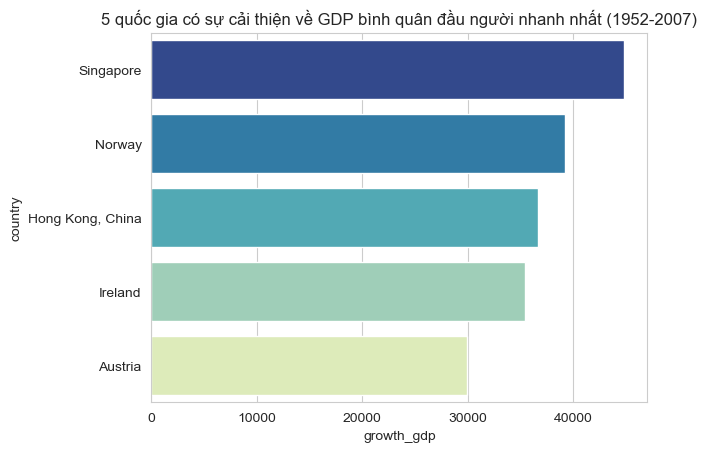

In [28]:
# Biểu đồ 5 quốc gia có sự cải thiện về GDP bình quân đầu người nhanh nhất (1952-2007)
sns.barplot(growth_gdp_new, x='growth_gdp', y='country', order=growth_gdp_new['country'], palette='YlGnBu_r');
plt.title('5 quốc gia có sự cải thiện về GDP bình quân đầu người nhanh nhất (1952-2007)');

Nhận xét:

=> Các nước trong top 5 có tốc độ tăng trưởng GDP mạnh mẽ trong giai đoạn sau chiến tranh, hầu hết là thuộc địa của Anh trước kia. Đặc biệt là Singapore GDP năm 2007 gần gấp 20 lần GPD  năm 1952. 

### Bước 8 - Phân tích giá trị tăng trưởng của các châu lục năm 2007 so với năm 1952
- Biểu đồ thể hiện tăng trưởng tuổi thọ của các châu lục
- Biểu đồ thể hiện tăng trưởng GDP bình quân đầu người của các châu lục

In [29]:
# Xác định sự cải thiện theo lục địa về tuổi thọ trung bình từ 1952 đến 2007
lifeExp_continent=pd.merge(gap_1952, gap_2007, how='inner', on=['country', 'continent'])
lifeExp_continent=lifeExp_continent[['continent','lifeExp_x', 'lifeExp_y']]
lifeExp_continent.rename(columns={'lifeExp_x':'lifeExp_1952','lifeExp_y':'lifeExp_2007'}, inplace=True)
lifeExp_continent['growth_lifeExp']=lifeExp_continent['lifeExp_2007']-lifeExp_continent['lifeExp_1952']
lifeExp_continent=lifeExp_continent.groupby(by='continent').agg({'lifeExp_1952':'mean','lifeExp_2007':'mean','growth_lifeExp':'mean'}).reset_index().sort_values(by='growth_lifeExp', ascending=False)
lifeExp_continent

,continent,lifeExp_1952,lifeExp_2007,growth_lifeExp
2,Asia,46.314394,70.728485,24.414091
1,Americas,53.279840,73.608120,20.328280
0,Africa,39.135500,54.806038,15.670538
3,Europe,64.408500,77.648600,13.240100
4,Oceania,69.255000,80.719500,11.464500


In [30]:
# Xác định sự cải thiện theo lục địa về GDP bình quân đầu người từ 1952 đến 2007
gdp_continent=pd.merge(gap_1952, gap_2007, how='inner', on=['country', 'continent'])
gdp_continent.rename(columns={'gdpPercap_x':'gdpPercap_1952','gdpPercap_y':'gdpPercap_2007'}, inplace=True)
gdp_continent['growth_gdp']=gdp_continent['gdpPercap_2007']-gdp_continent['gdpPercap_1952']
gdp_continent=gdp_continent.groupby(by='continent').agg({'gdpPercap_1952':'mean','gdpPercap_2007':'mean','growth_gdp':'mean'}).reset_index().sort_values(by='growth_gdp', ascending=False)
gdp_continent

,continent,gdpPercap_1952,gdpPercap_2007,growth_gdp
4,Oceania,10298.085650,29810.188275,19512.102625
3,Europe,5661.057435,25054.481636,19393.424201
2,Asia,5195.484004,12473.026870,7277.542866
1,Americas,4079.062552,11003.031625,6923.969073
0,Africa,1252.572466,3089.032605,1836.460139


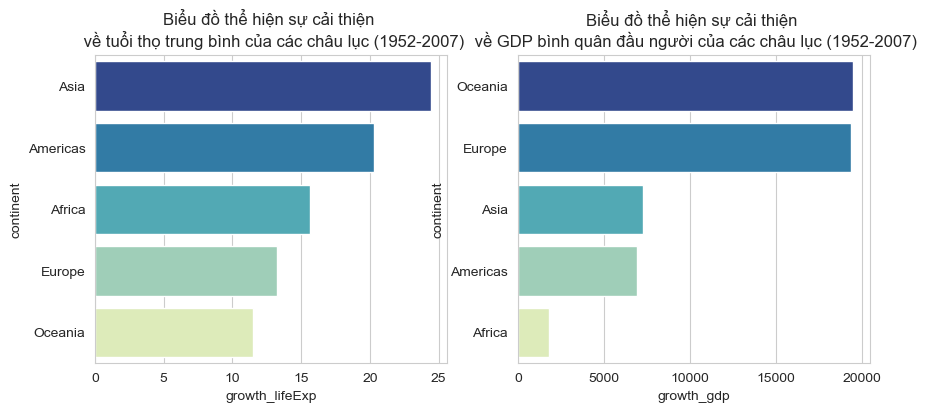

In [31]:
plt.figure(figsize=(10,4))
# Biểu đồ thể hiện sự cải thiện về tuổi thọ trung bình của các châu lục (1952-2007)
plt.subplot(1, 2, 1)
sns.barplot(data=lifeExp_continent, x='growth_lifeExp', y='continent', errorbar=None, order=lifeExp_continent['continent'], palette='YlGnBu_r')
plt.title('Biểu đồ thể hiện sự cải thiện \n về tuổi thọ trung bình của các châu lục (1952-2007)')

# Biểu đồ thể hiện sự cải thiện về GDP bình quân đầu người của các châu lục (1952-2007)
plt.subplot(1, 2, 2)
sns.barplot(data=gdp_continent, x='growth_gdp', y='continent', errorbar=None, order=gdp_continent['continent'], palette='YlGnBu_r')
plt.title('Biểu đồ thể hiện sự cải thiện \n về GDP bình quân đầu người của các châu lục (1952-2007)');

Nhận xét:

=> Qua 2 biểu đồ ta thấy Châu Á và Châu Mỹ có tuổi thọ trung bình lần lượt cao nhất nhì trên thế giới. 
Trong khi đó Châu Đại Dương và Châu Âu GDP bình quân đầu người cao nhất nhì và có chênh lệch lớn so với các châu lục còn lại, Châu Phi có GDP bình quân xếp cuối và rất thấp so với phần còn lại của thế giới.

### Bước 9 - Phân tích các chỉ số kinh tế xã hội của các quốc gia trên thế giới năm 2007
- Biểu đồ thể hiện 5 quốc gia có GDP bình quân đầu người cao nhất
- Biểu đồ thể hiện 5 quốc gia có GDP bình quân đầu người thấp nhất
- Biểu đồ thể hiện tương quan giữa GDP bình quân đầu người và tuổi thọ

In [32]:
# 5 quốc gia có GDP bình quân đầu người cao nhất năm 2007
gdp_max_2007=gap_new.sort_values(by='gdpPercap_2007', ascending=False).head()
gdp_max_2007

,country,gdpPercap_1952,gdpPercap_2007,growth_rate,growth_gdp
95,Norway,10095.421720,49357.19017,3.889067,39261.768450
71,Kuwait,108382.352900,47306.98978,-0.563518,-61075.363120
113,Singapore,2315.138227,47143.17964,19.363009,44828.041413
134,United States,13990.482080,42951.65309,2.070062,28961.171010
62,Ireland,5210.280328,40675.99635,6.806873,35465.716022


In [33]:
# 5 quốc gia có GDP bình quân đầu người thấp nhất năm 2007
gdp_min_2007=gap_new.sort_values(by='gdpPercap_2007').head()
gdp_min_2007

,country,gdpPercap_1952,gdpPercap_2007,growth_rate,growth_gdp
27,"Congo, Dem. Rep.",780.542326,277.551859,-0.644412,-502.990467
74,Liberia,575.572996,414.507341,-0.279835,-161.065655
17,Burundi,339.296459,430.070692,0.267537,90.774233
141,Zimbabwe,406.884115,469.709298,0.154406,62.825183
52,Guinea-Bissau,299.850319,579.231743,0.931736,279.381424


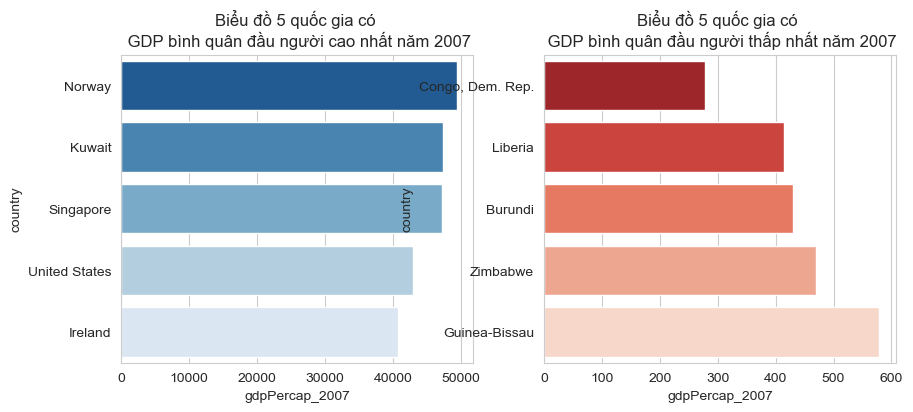

In [34]:
plt.figure(figsize=(10,4))
# Biểu đồ 5 quốc gia có GDP bình quân đầu người cao nhất năm 2007
plt.subplot(1, 2, 1)
sns.barplot(data=gdp_max_2007, x='gdpPercap_2007', y='country', order=gdp_max_2007['country'], palette='Blues_r');
plt.title('Biểu đồ 5 quốc gia có \n GDP bình quân đầu người cao nhất năm 2007');
# Biểu đồ 5 quốc gia có GDP bình quân đầu người thấp nhất năm 2007
plt.subplot(1, 2, 2)
sns.barplot(data=gdp_min_2007, x='gdpPercap_2007', y='country', order=gdp_min_2007['country'], palette='Reds_r');
plt.title('Biểu đồ 5 quốc gia có \n GDP bình quân đầu người thấp nhất năm 2007');

Nhận xét:

=> Chênh lệch GDP bình quân đầu người giữa các quốc gia có thu nhập cao nhất và thấp nhất là rất lớn. 
Như Norway có GDP trung bình năm 49357 USD, trong khi Congo, Dem. Rep. chỉ có 278 USD (gấp gần 177 lần). 
Ngoài ra, nhìn vào bảng số liệu ta còn thấy các quốc gia có thu nhập thấp có GDP tăng trưởng âm hoặc rất ít. 

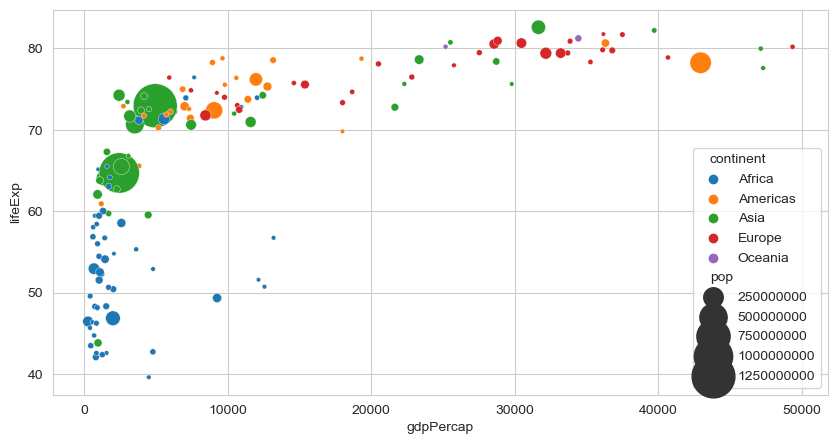

In [46]:
# Biểu đồ phân tán giữa tuổi thọ, GDP bình quân đầu người và dân số cho năm 2007
plt.figure(figsize=(10,5))
sns.scatterplot(data=gap_2007, y='lifeExp', x='gdpPercap', size='pop', sizes=(10, 1000), hue='continent');

Nhận xét:

=> Ta thấy các quốc gia có GDP càng cao thì tuổi thọ càng cao. 

Hầu hết các nước Châu Úc có tuổi thọ và GDP bình quân rất cao. 

Châu Á, Châu Âu và Châu Mỹ phần lớn có tuổi thọ trung bình cao, tuy nhiên về GDP bình quân thì còn chênh lệch nhiều giữa 
các nước trong cùng châu lục. 

Châu Phi có tuổi thọ và GDP bình quân thấp nhất trong các châu lục.